<a href="https://colab.research.google.com/github/SonamTenzin7/Binary-Classification/blob/main/Explroratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
data = pd.read_csv("dataset.csv")

In [ ]:
data = data.drop(data.columns[0],axis=1)

In [ ]:
# Sanity check of data
data.shape

(2299, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299 entries, 0 to 2298
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              2299 non-null   int64  
 1   Gender                           2299 non-null   int64  
 2   Body_Height                      2299 non-null   float64
 3   Body_Weight                      2299 non-null   float64
 4   Education_ID                     2227 non-null   float64
 5   Financial_status                 2188 non-null   float64
 6   GDS                              2186 non-null   float64
 7   Independent_or_depend_on_family  2188 non-null   float64
 8   Marital_status_ID                2188 non-null   float64
 9   MNAa_total                       1926 non-null   float64
 10  MNAb_total                       1851 non-null   float64
 11  MMSE_class_binary                2299 non-null   int64  
dtypes: float64(9), int64

In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
Body_Height,0
Body_Weight,0
Education_ID,72
Financial_status,111
GDS,113
Independent_or_depend_on_family,111
Marital_status_ID,111
MNAa_total,373


In [ ]:
# Null
data.isnull().sum()/data.shape[0]*100

,0
Age,0.000000
Gender,0.000000
Body_Height,0.000000
Body_Weight,0.000000
Education_ID,3.131796
Financial_status,4.828186
GDS,4.915181
Independent_or_depend_on_family,4.828186
Marital_status_ID,4.828186
MNAa_total,16.224445


In [ ]:
# Separate categorical and numerical columns based on the updated understanding

# List of categorical columns
categorical_columns = [
    'Gender',
    'Independent_or_depend_on_family',
    'Marital_status_ID',
    'Education_ID',
    'Financial_status',
    'GDS',
]

# List of numerical columns
numerical_columns = [
    'Age',
    'Body_Height',
    'Body_Weight',
    'MNAa_total',
    'MNAb_total'
]

# Store categorical and numerical data in separate DataFrames
categorical_data = data[categorical_columns]
numerical_data = data[numerical_columns]

# Display the first few rows of each to verify
categorical_data.head(), numerical_data.head()


(   Gender  Independent_or_depend_on_family  Marital_status_ID  Education_ID  \
 0       0                              0.0                3.0           1.0   
 1       1                              0.0                2.0           NaN   
 2       0                              0.0                3.0           NaN   
 3       0                              0.0                1.0           NaN   
 4       0                              0.0                3.0           1.0   
 
    Financial_status  GDS  
 0               8.0  5.0  
 1               4.0  2.0  
 2               2.0  3.0  
 3               2.0  3.0  
 4               2.0  2.0  ,
    Age  Body_Height  Body_Weight  MNAa_total  MNAb_total
 0   86        148.3         61.1        12.0        10.5
 1   92        156.2         61.5        14.0        15.0
 2   81        146.3         47.0        13.0        15.0
 3   79        152.2         65.3        14.0        16.0
 4   86        157.3         57.3        13.0        13.5)

In [ ]:
# Step 4 Exploratory data analysis
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,2299.0,77.492823,8.919342,51.0,70.00,77.0,84.0,104.0
Gender,2299.0,0.318399,0.465957,0.0,0.00,0.0,1.0,1.0
Body_Height,2299.0,154.240017,8.222128,109.0,148.50,153.4,160.0,184.0
Body_Weight,2299.0,57.190626,10.278072,21.1,50.05,56.3,63.8,98.0
Education_ID,2227.0,1.998653,0.837410,1.0,1.00,2.0,3.0,4.0
Financial_status,2188.0,2.675046,1.806855,1.0,1.00,2.0,4.0,8.0
GDS,2186.0,2.263038,2.790123,0.0,0.00,1.0,3.0,15.0
Independent_or_depend_on_family,2188.0,0.685101,0.464582,0.0,0.00,1.0,1.0,1.0
Marital_status_ID,2188.0,2.426417,0.802703,1.0,2.00,2.0,3.0,6.0
MNAa_total,1926.0,12.694704,1.528344,4.0,12.00,13.0,14.0,14.0


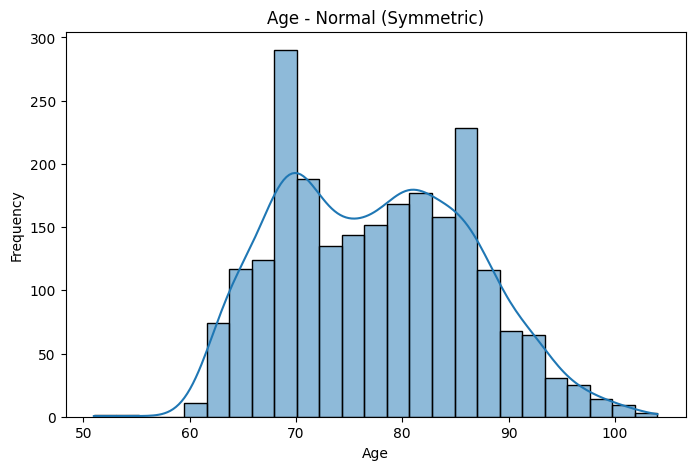

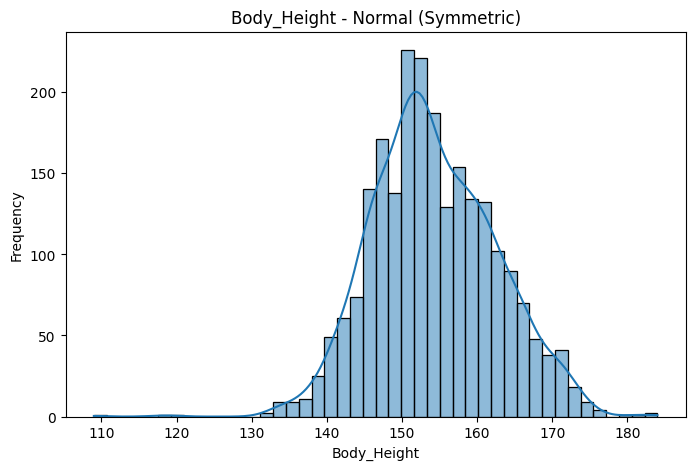

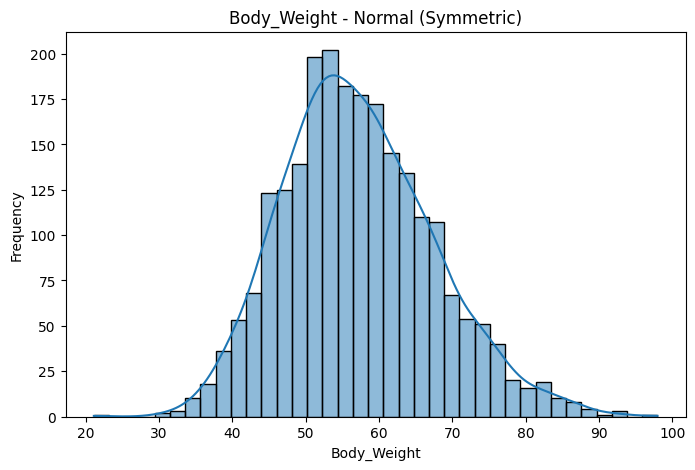

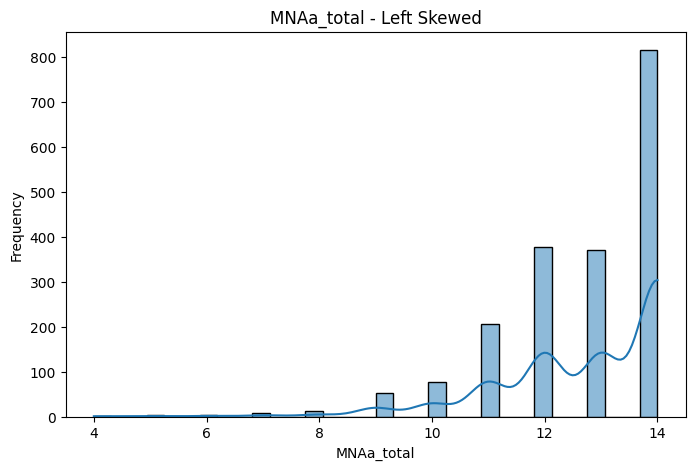

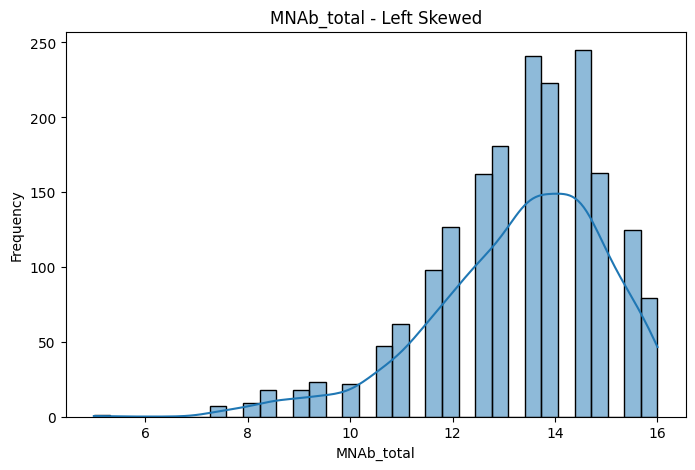

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Function to determine the distribution shape based on skewness and kurtosis
def distribution_shape(data_column):
    skewness = skew(data_column)
    kurt = kurtosis(data_column)

    # Determine shape based on skewness and kurtosis
    if abs(skewness) < 0.5 and abs(kurt) < 1:
        return "Normal (Symmetric)"
    elif skewness < -0.5:
        return "Left Skewed"
    elif skewness > 0.5:
        return "Right Skewed"
    elif kurt > 3:
        return "Bimodal"
    elif abs(kurt + 1.2) < 0.5:  # Kurtosis for uniform is around -1.2
        return "Uniform"
    else:
        return "Unknown Shape"

# Loop through each numeric column and plot histogram with shape in the title
for column in numerical_data.columns:
    column_data = numerical_data[column].dropna()  # Drop NaNs for analysis
    shape = distribution_shape(column_data)

    plt.figure(figsize=(8, 5))
    sns.histplot(data=column_data, kde=True)
    plt.title(f"{column} - {shape}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


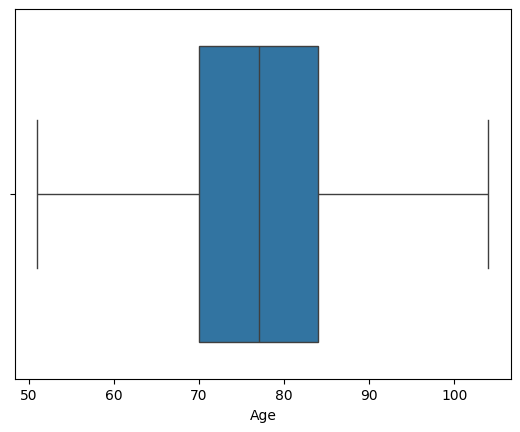

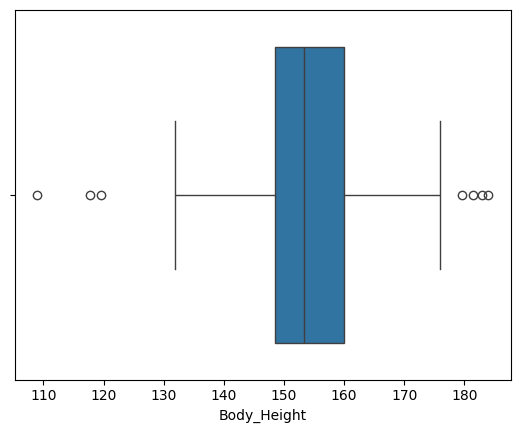

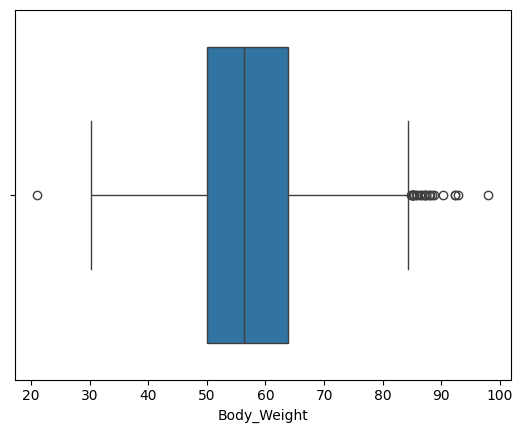

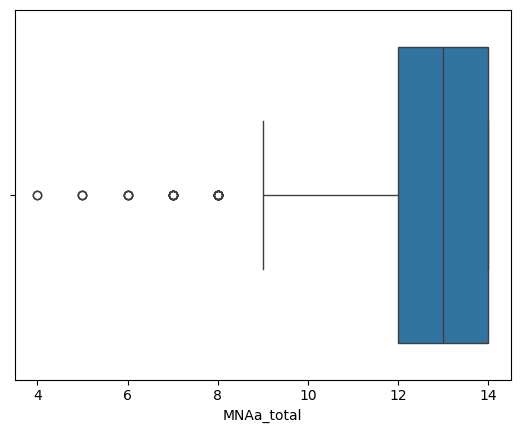

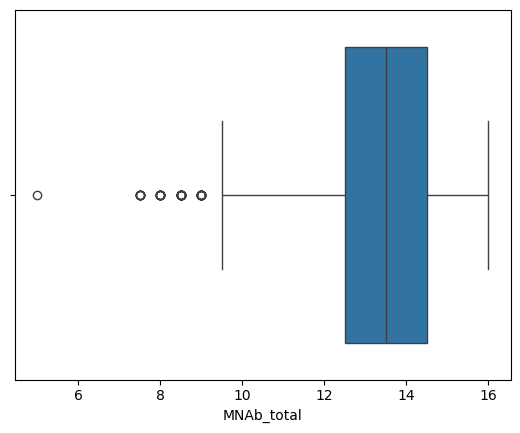

In [ ]:
# BoxPlot to identify the outliers
for i in numerical_columns:
  sns.boxplot(data=data,x=i)
  plt.show()

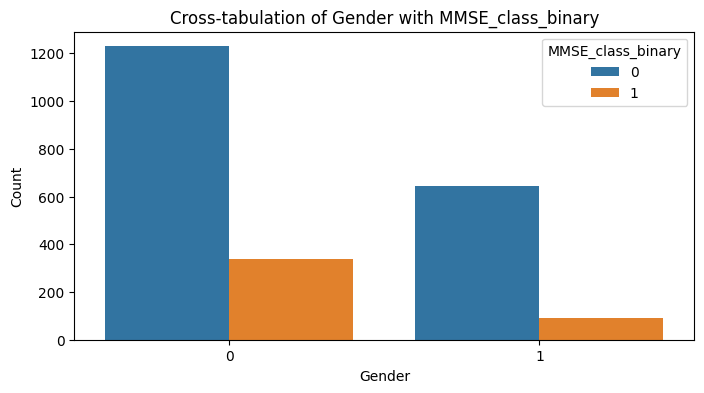

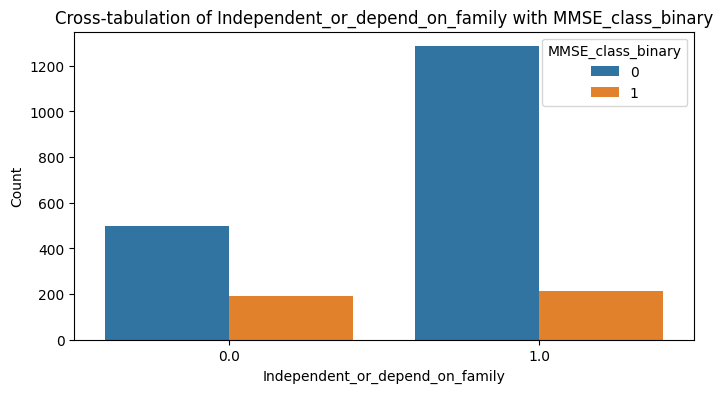

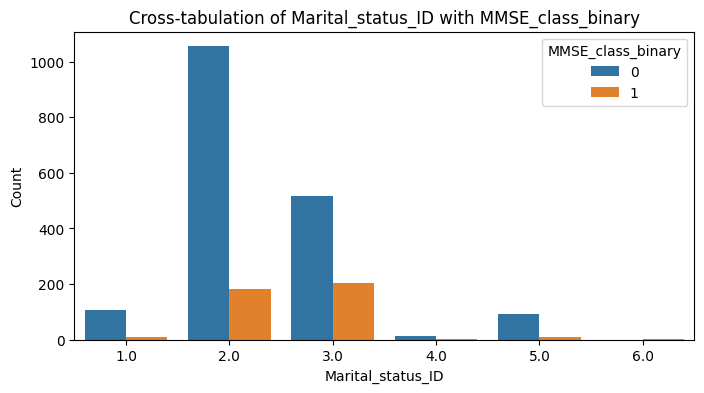

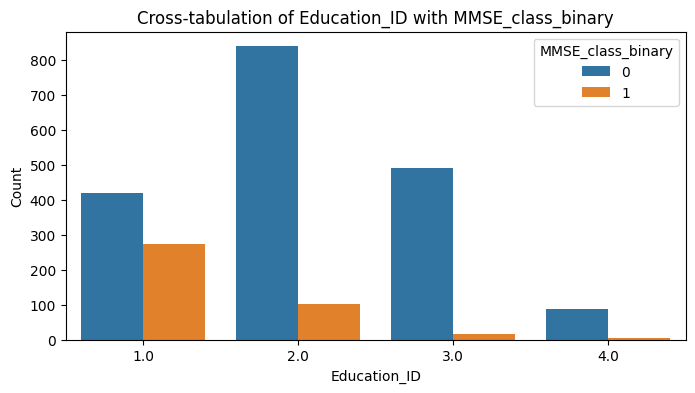

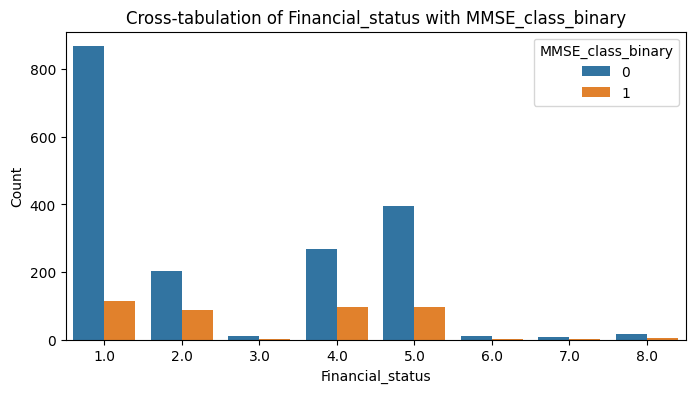

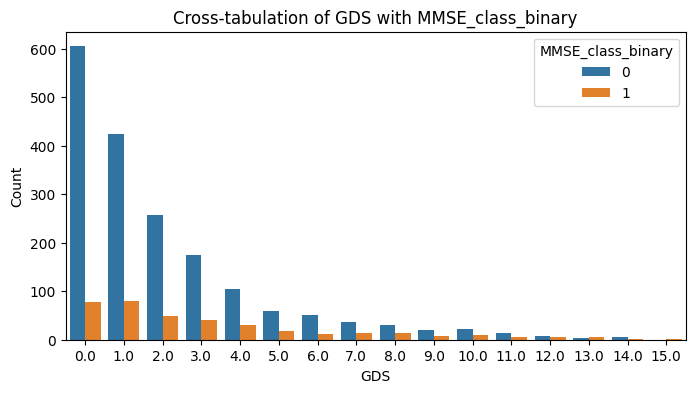

In [ ]:
# Loop through each categorical column and plot the cross-tabulation with MMSE_class_binary
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=column, hue='MMSE_class_binary')
    plt.title(f'Cross-tabulation of {column} with MMSE_class_binary')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='MMSE_class_binary', labels=['0', '1'])
    plt.show()

In [ ]:
# correlation with heat map to interpret the relationship and multicolliniarity
s=data.select_dtypes(include="number").corr()

<Axes: >

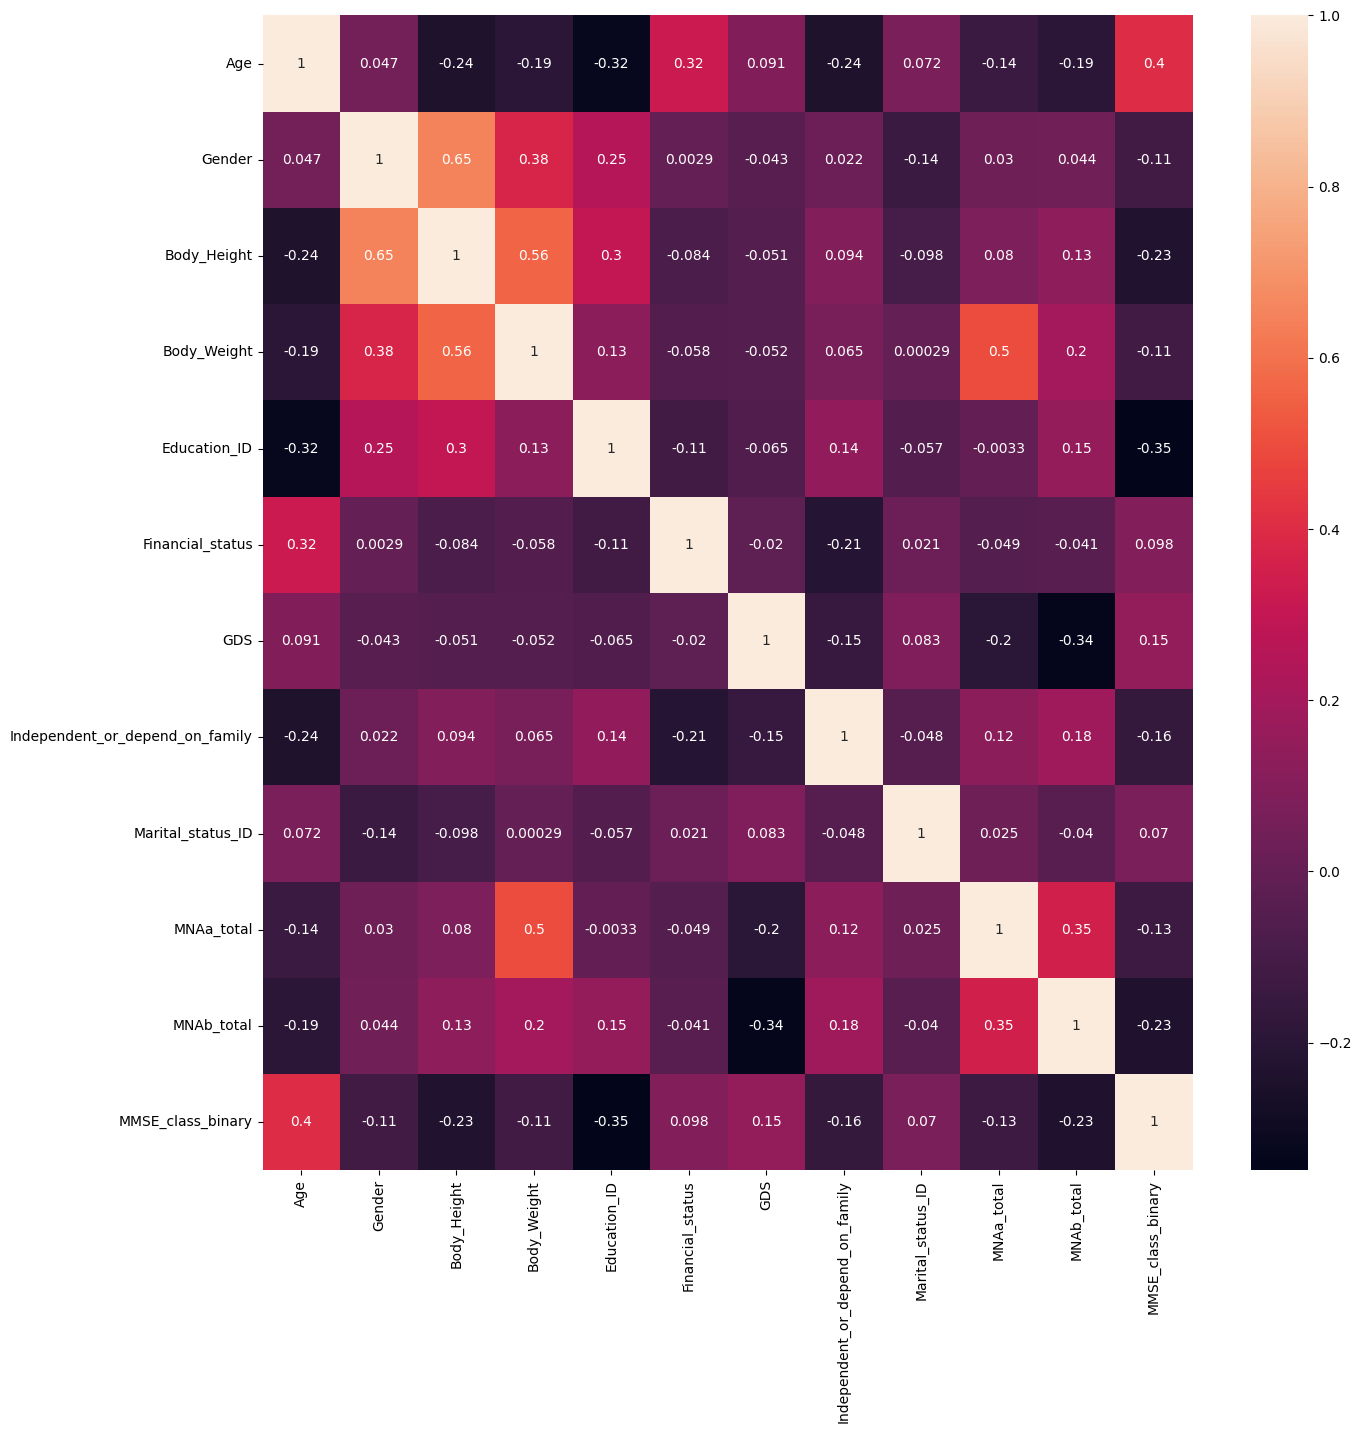

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [ ]:
# Checking for null values in %
round((data.isnull().sum()/data.shape[0])*100,2)

,0
Age,0.00
Gender,0.00
Body_Height,0.00
Body_Weight,0.00
Education_ID,3.13
Financial_status,4.83
GDS,4.92
Independent_or_depend_on_family,4.83
Marital_status_ID,4.83
MNAa_total,16.22


In [ ]:
# Imputing missing values
# Mean Imputing (Normally Distributed with no outliers)
# Median Imputing (for Outliers/Skewed Data)
# Mode Imputation is for discrete and catagorical

# Median Imputing (for Outliers/Skewed Data)
cleaned_df = data.fillna({
    'MNAa_total': data['MNAa_total'].median(),
    'MNAb_total': data['MNAa_total'].median()
})

col_mode_impute = ['Education_ID', 'Financial_status', 'GDS', 'Marital_status_ID', 'Independent_or_depend_on_family','Marital_status_ID', 'Financial_status']

for columns in col_mode_impute:
  mode_value = cleaned_df[columns].mode()[0]
  cleaned_df[columns].fillna(mode_value, inplace = True)

round((cleaned_df.isnull().sum()/cleaned_df.shape[0])*100,2)

cleaned_df.head(15)

<ipython-input-18-1ab66d15c453>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df[columns].fillna(mode_value, inplace = True)


,Age,Gender,Body_Height,Body_Weight,Education_ID,Financial_status,GDS,Independent_or_depend_on_family,Marital_status_ID,MNAa_total,MNAb_total,MMSE_class_binary
0,86,0,148.3,61.1,1.0,8.0,5.0,0.0,3.0,12.0,10.5,0
1,92,1,156.2,61.5,2.0,4.0,2.0,0.0,2.0,14.0,15.0,0
2,81,0,146.3,47.0,2.0,2.0,3.0,0.0,3.0,13.0,15.0,0
3,79,0,152.2,65.3,2.0,2.0,3.0,0.0,1.0,14.0,16.0,0
4,86,0,157.3,57.3,1.0,2.0,2.0,0.0,3.0,13.0,13.5,0
5,80,0,147.1,51.1,1.0,2.0,2.0,0.0,3.0,14.0,15.0,1
6,84,0,150.0,45.8,2.0,1.0,2.0,1.0,2.0,12.0,13.0,0
7,85,0,153.4,61.6,2.0,5.0,4.0,1.0,2.0,12.0,13.5,0
8,91,0,157.0,59.6,2.0,1.0,1.0,1.0,3.0,13.0,13.0,1
9,99,0,140.0,48.3,2.0,2.0,1.0,0.0,3.0,10.0,8.5,1


In [ ]:
# Create a filtered DataFrame
data_filtered = cleaned_df[
    ~cleaned_df['Marital_status_ID'].isin([4,6]) &
    ~cleaned_df['Financial_status'].isin([3, 6, 7])
]
print(data_filtered.head())
data_filtered.shape

   Age  Gender  Body_Height  Body_Weight  Education_ID  Financial_status  GDS  \
0   86       0        148.3         61.1           1.0               8.0  5.0   
1   92       1        156.2         61.5           2.0               4.0  2.0   
2   81       0        146.3         47.0           2.0               2.0  3.0   
3   79       0        152.2         65.3           2.0               2.0  3.0   
4   86       0        157.3         57.3           1.0               2.0  2.0   

   Independent_or_depend_on_family  Marital_status_ID  MNAa_total  MNAb_total  \
0                              0.0                3.0        12.0        10.5   
1                              0.0                2.0        14.0        15.0   
2                              0.0                3.0        13.0        15.0   
3                              0.0                1.0        14.0        16.0   
4                              0.0                3.0        13.0        13.5   

   MMSE_class_binary  
0  

(2245, 12)

In [ ]:
from scipy.stats import skew

# Select the numerical columns you are interested in
numerical_columns = ['Age', 'Body_Height', 'Body_Weight', 'MNAa_total', 'MNAb_total']

# Calculate skewness for each numerical column in the filtered DataFrame
skewness_values = data_filtered[numerical_columns].apply(skew)

# Display the skewness values
print("Skewness of numerical columns in filtered data:")
print(skewness_values)


Skewness of numerical columns in filtered data:
Age            0.212265
Body_Height    0.098257
Body_Weight    0.407463
MNAa_total    -1.698511
MNAb_total    -0.807475
dtype: float64


In [ ]:
from sklearn.preprocessing import PowerTransformer

# Create a copy of the data to apply Yeo-Johnson transformation
transformed_data_yeojohnson = data_filtered.copy()

# Initialize the PowerTransformer with method='yeo-johnson'
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

# Apply Yeo-Johnson transformation to the relevant columns
transformed_data_yeojohnson[['MNAa_total_yeojohnson', 'MNAb_total_yeojohnson']] = yeo_johnson_transformer.fit_transform(
    transformed_data_yeojohnson[['MNAa_total', 'MNAb_total']]
)

# Check skewness after Yeo-Johnson transformation
skewness_after_yeojohnson = transformed_data_yeojohnson[['MNAa_total_yeojohnson', 'MNAb_total_yeojohnson']].apply(skew)

# Print the skewness after Yeo-Johnson transformation
print("Skewness after Yeo-Johnson transformation:")
print(skewness_after_yeojohnson)


Skewness after Yeo-Johnson transformation:
MNAa_total_yeojohnson   -0.295294
MNAb_total_yeojohnson    0.001125
dtype: float64


In [ ]:
X=transformed_data_yeojohnson.drop(columns=['MMSE_class_binary'])
Y=transformed_data_yeojohnson['MMSE_class_binary']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Verify the shapes and data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (1796, 13)
Shape of X_test: (449, 13)
Shape of Y_train: (1796,)
Shape of Y_test: (449,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize a new scaler for the MinMax scaling process
scaler = MinMaxScaler(feature_range=(0,1))
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the Neural Network Model
model = tf.keras.models.Sequential ([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the Model
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6685 - loss: 0.6102 - val_accuracy: 0.8167 - val_loss: 0.4496
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8120 - loss: 0.4480 - val_accuracy: 0.8167 - val_loss: 0.4204
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8116 - loss: 0.4316 - val_accuracy: 0.8167 - val_loss: 0.3881
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8167 - loss: 0.3951 - val_accuracy: 0.8389 - val_loss: 0.3587
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8182 - loss: 0.4015 - val_accuracy: 0.8361 - val_loss: 0.3492
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8261 - loss: 0.3713 - val_accuracy: 0.8417 - val_loss: 0.3376
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8395 - loss: 0.3553 - val_accuracy: 0.8472 - val_loss: 0.3340
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8238 - loss: 0.3783 - val_accuracy: 0.8694 - val_loss

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Step 6: Make Predictions
predictions = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8559 - loss: 0.3488
Test Loss: 0.350856214761734, Test Accuracy: 0.8485523462295532
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
